###### Titanic Project

Importing the Dataset

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv(r'C:\Users\Dell\Documents\titanic.csv')

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

PassengerId - Id of the passenger
Survived - Survived or dead	0 = No, 1 = Yes
Pclass	- Ticket class	1 = 1st - upper, 2 = 2nd - middle, 3 = 3rd - lower
Name - Name of the passenger
Sex	- Sex either Female or male
Age -	Age in years	
sibsp - no of siblings / spouses aboard the Titanic	
parch - no of parents / children aboard the Titanic	
ticket - Ticket number	
fare - Passenger fare	
cabin - Cabin number	
embarked -	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [8]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [9]:
data['Survived'].unique()

array([0, 1], dtype=int64)

In [10]:
data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [11]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Ok so we have 177 null values in Age column.
687 missing values in Cabin column.
2 missing values in Embarked column.

In [13]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Since, most of the people embarked from Southampton(S), we can replace the 2 null data with S

In [14]:
#filling missing values in Embarked 
data['Embarked'].fillna('S', inplace = True)    #Two null values in embarked are filled with S

In [15]:
#fill missing value in Age column with mean of ages 
age_mean= data['Age'].mean()
data.Age.fillna(round(age_mean),inplace=True)

We see that the 'Cabin' column has a very high percentage of missing values yet we do not drop the column and instead replace the null values with 'N/A' strings so that we can later explore the possibility of the presence of a cabin value as a predictor of survival.

In [16]:
#Replacing the null values with 'N/A' strings in the 'Cabin' column:
data['Cabin'].fillna('N/A', inplace = True)

In [17]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

From the above cell, we can notice that the null values of Cabin, Embarked and Age columns are filled.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Maximum number of children/parents board the titanic are 6 
Maximum number of siblings/spouse board the titanic are 8

###### Exploratory Data Analysis

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

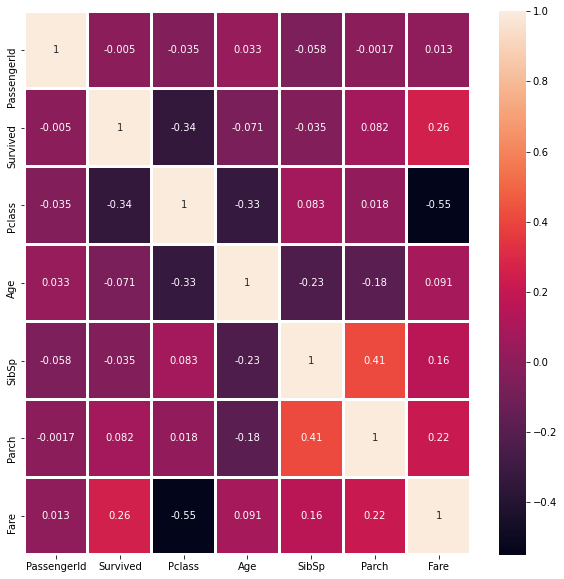

In [21]:
plt.figure(figsize = [10, 10])
sns.heatmap(data.corr(), annot = True, linewidths = 2)
plt.show()

We see that Pclass and survived are negatively correlated. It means, the lower the number in Pclass, the higher the number of Survived
Fare and Survived: 0.26.
There is a positive correlation between Fare and Survived. This can be explained by saying that, the passenger who paid more money for their ticket were more likely to survive.
Fare and Pclass: -0.55
This relationship can be explained by saying that first class passenger(1) paid more for fare then second class passenger(2), similarly second class passenger paid more than the third class passenger(3)


###### who survived the most either male or female?

In [22]:
data.groupby('Sex').sum()['Survived']

Sex
female    233
male      109
Name: Survived, dtype: int64

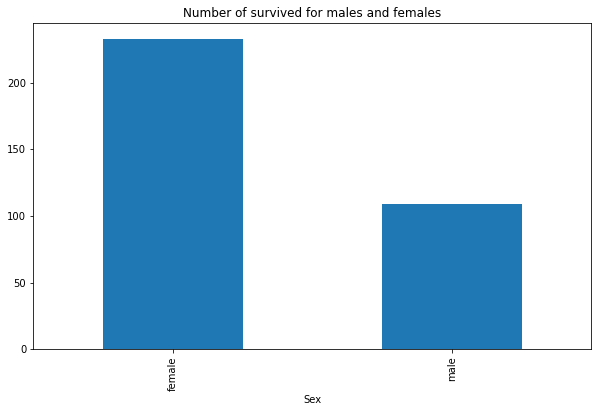

In [23]:
data.groupby('Sex').sum()['Survived'].plot(kind='bar',figsize=(10,6))
plt.title('Number of survived for males and females')
plt.show();

From the bar chart, we find that female are survived the most when compared to male.

###### How many have survived based on Pclass?

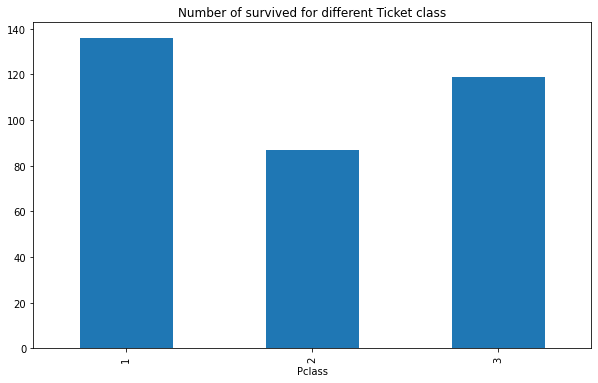

In [24]:
data.groupby('Pclass').sum()['Survived'].plot(kind='bar',figsize=(10,6))
plt.title('Number of survived for different Ticket class');
plt.show();

From the above bar graph, we find that maximum number of people survived are from class 1(upper class)

([<matplotlib.axis.XTick at 0x24f800de700>,
 [Text(1, 0, 'First'), Text(2, 0, 'Second'), Text(3, 0, 'Third')])

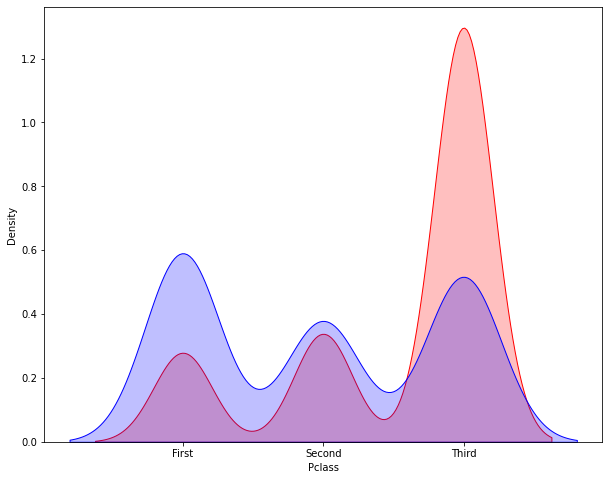

In [25]:
plt.subplots(figsize=(10,8))
sns.kdeplot(data.loc[(data['Survived'] == 0),'Pclass'],shade=True,color='r',label='Not Survived')
ax=sns.kdeplot(data.loc[(data['Survived'] == 1),'Pclass'],shade=True,color='b',label='Survived' )

labels = ['First', 'Second', 'Third']
plt.xticks(sorted(data.Pclass.unique()),labels)

This kde plot is pretty self explanatory with all the labels and colors. 
I have noticed that in the plot, the third class passengers have survived more than second class passnegers. It is true since there were a lot more third class passengers than first and second.

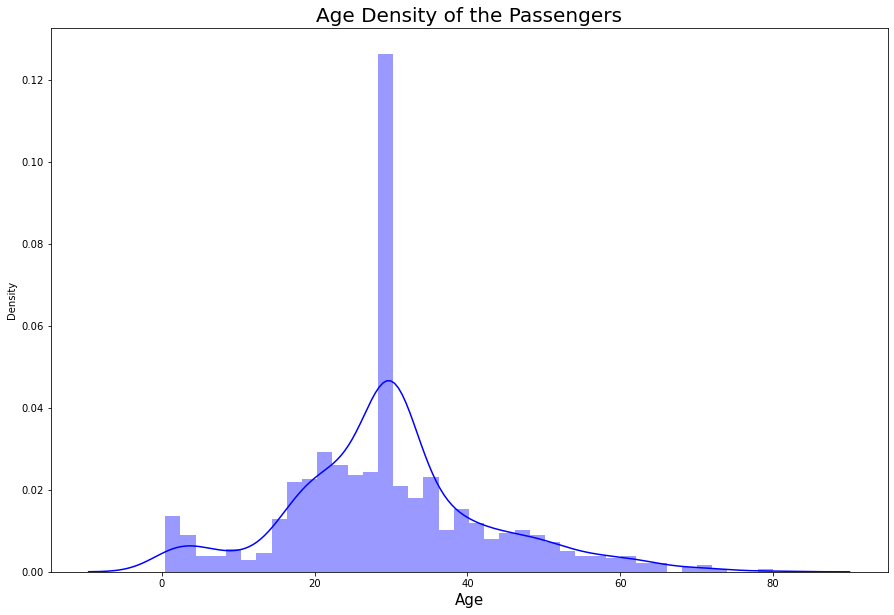

In [26]:
plt.figure(figsize = (15, 10))
sns.distplot(data['Age'].dropna(), color = 'blue', bins = 40, kde = True)
plt.title('Age Density of the Passengers', fontsize = 20)
plt.xlabel('Age', fontsize = 15)
plt.show()

Most of the passengers are aged between 20 and 40 age group.

Lets create a new feature 'IsAlone' that tells us if the passenger is travelling solo or with a family.

In [27]:
data['IsAlone'] = data['SibSp'] + data['Parch']
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N/A,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N/A,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N/A,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,N/A,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,N/A,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


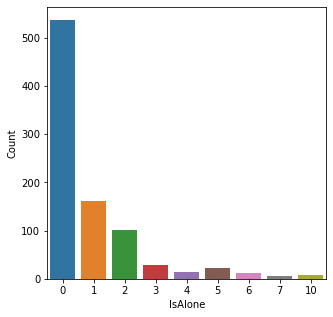

In [28]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = 'IsAlone',data=data)
plt.xlabel('IsAlone', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.show()

From the above Isalone countplot,we can find that most of the passengers have travelled alone,without the family.

In [29]:
#Converting solely travelled passengers to alone and passengers travelled with family to not alone 

def convert_IsAlone(data):   
    
    bins =[None]* len(data)

    for i in range(len(data)):
        if(data.IsAlone[i] in [0]):
            bins[i] = 'Alone'
        if(data.IsAlone[i] in [1, 2, 3, 4, 5, 6, 7, 10]):
            bins[i] = 'Not Alone'

    data['IsAlone'] = bins
    
convert_IsAlone(data)
data



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N/A,S,Not Alone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Not Alone
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N/A,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Not Alone
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N/A,S,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,N/A,S,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,N/A,S,Not Alone
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Alone


###### Dropping the columns that are no longer needed to predict the survived candidate of titanic accident

In [30]:
data.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis = 1, inplace = True)
data

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone
0,1,0,3,male,22.0,7.2500,Not Alone
1,2,1,1,female,38.0,71.2833,Not Alone
2,3,1,3,female,26.0,7.9250,Alone
3,4,1,1,female,35.0,53.1000,Not Alone
4,5,0,3,male,35.0,8.0500,Alone
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,13.0000,Alone
887,888,1,1,female,19.0,30.0000,Alone
888,889,0,3,female,30.0,23.4500,Not Alone
889,890,1,1,male,26.0,30.0000,Alone


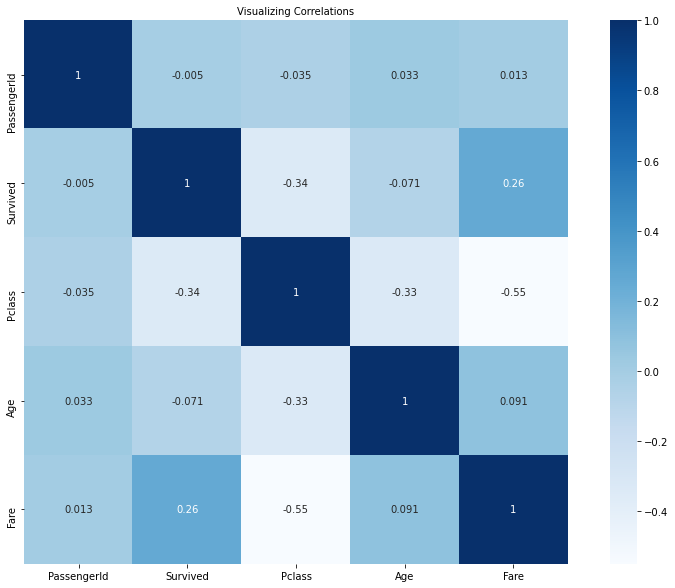

In [31]:
plt.figure(figsize = (15, 10))
sns.heatmap(data.corr(), cmap = 'Blues', square = True, annot = True)
plt.title("Visualizing Correlations", size = 10)
plt.show()

In [32]:
#encoding the categorical data from text to digits
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['IsAlone'] = label_encoder.fit_transform(data['IsAlone'])
    


In [33]:
X=data.drop('Survived',axis=1)
y=data.Survived

###### Splitting the data into train and test data sets

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [61]:
y_train_pred=LogisticRegression().fit(X_train, y_train).predict(X_test)

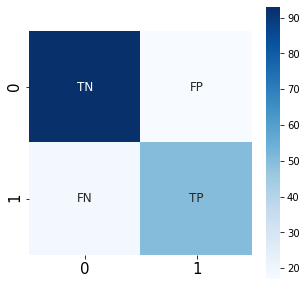

In [62]:
labels = ['TN', 'FP', 'FN', 'TP']
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(y_test, y_train_pred), 
            annot = labels, fmt = '', 
            cmap = 'Blues', 
            annot_kws={'size': 12}, 
            square = True)
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.show()
       


In [66]:
def get_model_results(cm_for_mod, y_test, y_pred, model_name):
        
    print('The F1 score for ' + model_name + ' is:', f1_score(y_test, y_pred))
    
    fig, axes = plt.subplots(1, 2, figsize = (10, 10))
    
    fig.suptitle('Graphs for ' + model_name, fontsize = 15)
    
    sns.heatmap(cm_for_mod, ax = axes[0], annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    axes[0].set_title('Confusion Matrix', fontsize = 15)
    
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    sns.lineplot(fpr, tpr, ax = axes[1])
    axes[1].set_title('ROC Curve (' + str(round(roc_auc, 3)) + ')', fontsize = 12)
    axes[1].plot([0, 1], [0, 1],'b--'), 2
    plt.show()

###### Logistic Regression

The training accuracy for logistic regression is: 79.63483146067416 %
The testing accuracy for logistic regression is: 79.88826815642457 %
The F1 score for Logistic Regression is: 0.7352941176470589


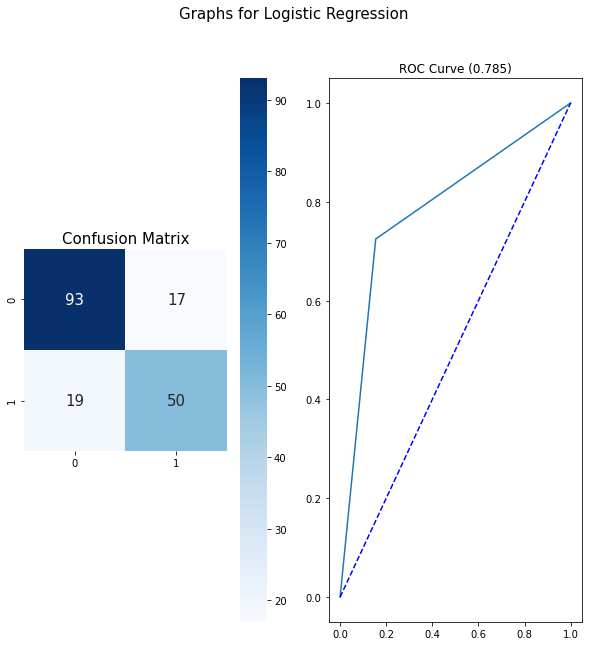

In [67]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test) #predicting based on the testing data
acc_lr = lr.score(X_test, y_test) #determining the accuracy
print("The training accuracy for logistic regression is:", lr.score(X_train, y_train) * 100, "%")
print("The testing accuracy for logistic regression is:", acc_lr * 100, "%")
cm_lr = confusion_matrix(y_test, y_pred)
get_model_results(cm_lr, y_test, y_pred, 'Logistic Regression')

###### K Nearest Neighbors

The training accuracy for KNN is: 73.17415730337079 %
The testing accuracy for KNN is: 63.128491620111724 %
The F1 score for K Nearest Neighbors is: 0.4210526315789474


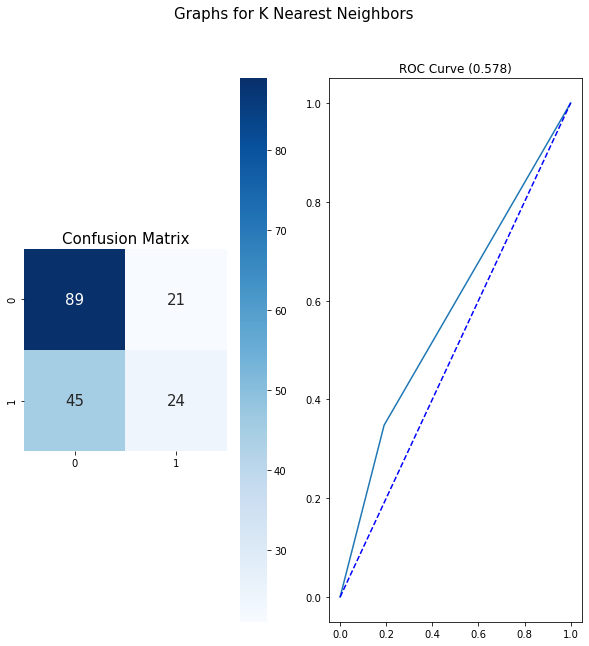

In [68]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test) #predicting based on testing data
acc_knn = knn.score(X_test, y_test) #determining the accuracy
print("The training accuracy for KNN is:", knn.score(X_train, y_train) * 100, "%")
print("The testing accuracy for KNN is:", acc_knn * 100, "%")
cm_knn = confusion_matrix(y_test, y_pred)
get_model_results(cm_knn, y_test, y_pred, 'K Nearest Neighbors')


###### Decision Tree Classifier

The training accuracy for Decision Tree Classifier is: 100.0 %
The testing accuracy for Decision Tree Classifier is: 78.77094972067039 %
The F1 score for Decision Tree Classifier is: 0.7205882352941175


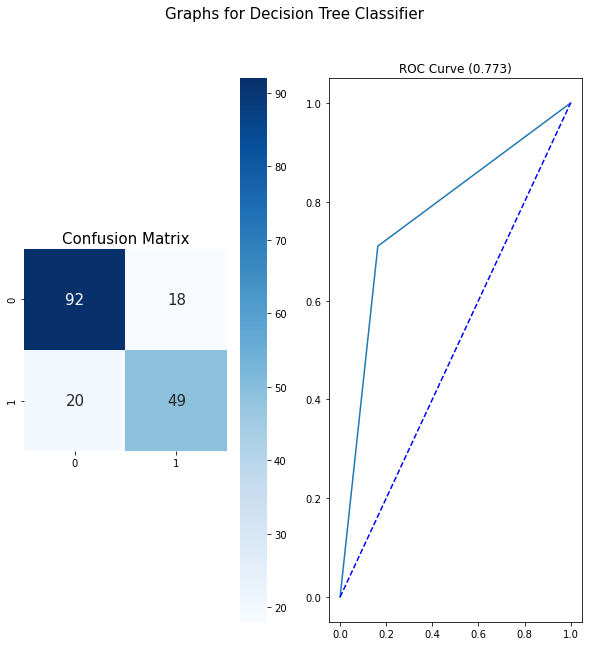

In [70]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
acc_dt = dt.score(X_test, y_test)
print("The training accuracy for Decision Tree Classifier is:", dt.score(X_train, y_train) * 100, "%")
print("The testing accuracy for Decision Tree Classifier is:", acc_dt * 100, "%")
cm_dt = confusion_matrix(y_test, y_pred)
get_model_results(cm_dt, y_test, y_pred, 'Decision Tree Classifier')

###### Support Vector Classifier

The training accuracy for SVC is: 63.20224719101124 %
The testing accuracy for SVC is: 65.92178770949721 %
The F1 score for Support Vector Classifier is: 0.22784810126582278


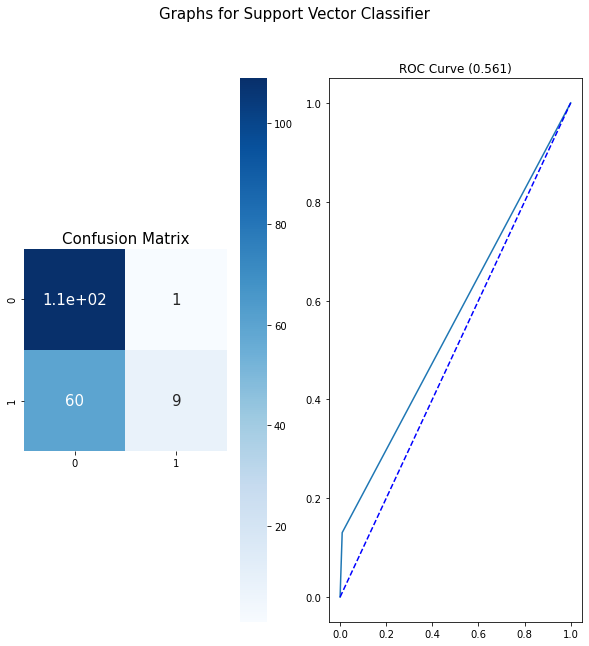

In [69]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test) #predicting based on testing data
acc_svc = svc.score(X_test, y_test)  #determining the accuracy
print("The training accuracy for SVC is:", svc.score(X_train, y_train) * 100, "%")
print("The testing accuracy for SVC is:", acc_svc * 100, "%")
cm_svc = confusion_matrix(y_test, y_pred)
get_model_results(cm_svc, y_test, y_pred, 'Support Vector Classifier')

###### Random Forest Classifier

The training accuracy for Random Forest Classifier is: 100.0 %
The testing accuracy for Random Forest Classifier is: 85.47486033519553 %
The F1 score for Random Forest Classifier is: 0.796875


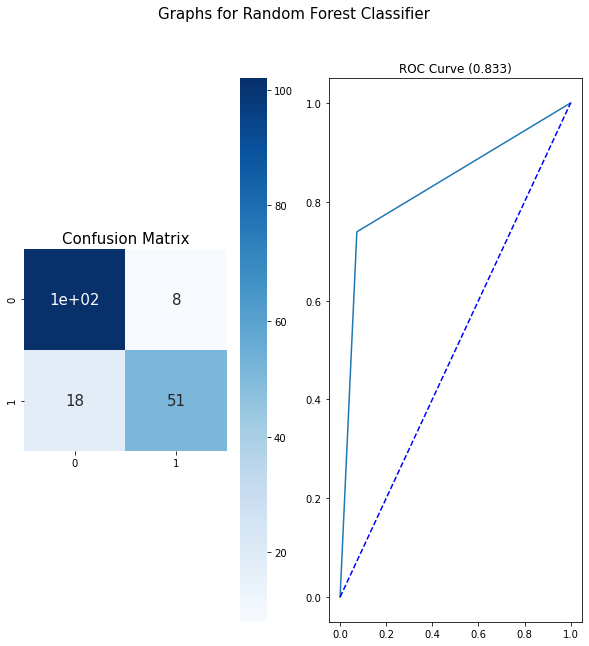

In [73]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc_rf = rf.score(X_test, y_test)
print("The training accuracy for Random Forest Classifier is:", rf.score(X_train, y_train) * 100, "%")
print("The testing accuracy for Random Forest Classifier is:", acc_rf * 100, "%")
cm_rf = confusion_matrix(y_test, y_pred)
get_model_results(cm_rf, y_test, y_pred, 'Random Forest Classifier')

###### Ada Boost Classifier

The training accuracy for Ada Boost Classifier is: 83.14606741573034 %
The testing accuracy for Ada Boost Classifier is: 77.09497206703911 %
The F1 score for Ada Boost Classifier is: 0.7092198581560285


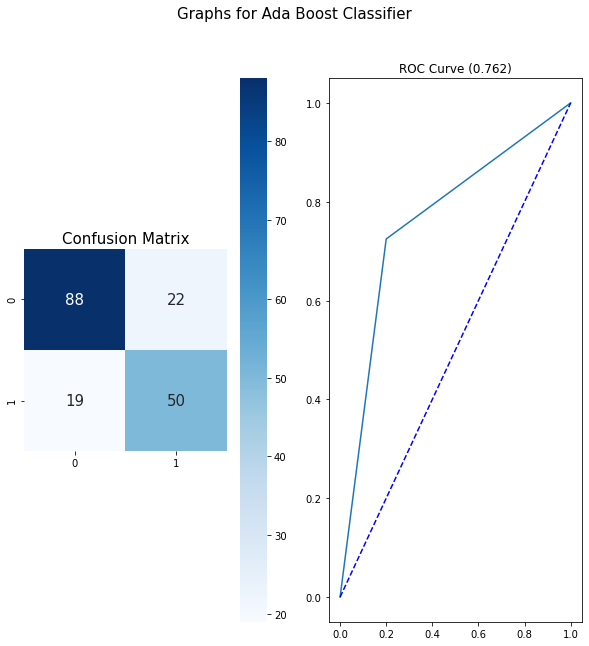

In [74]:
adc = AdaBoostClassifier()
adc.fit(X_train, y_train)
y_pred = adc.predict(X_test)
acc = adc.score(X_test, y_test)
acc_adc = adc.score(X_test, y_test)
print("The training accuracy for Ada Boost Classifier is:", adc.score(X_train, y_train) * 100, "%")
print("The testing accuracy for Ada Boost Classifier is:", acc_adc * 100, "%")
cm_adc = confusion_matrix(y_test, y_pred)
get_model_results(cm_adc, y_test, y_pred, 'Ada Boost Classifier')

By fitting the train and test data into various models, we find that accuracy for Random Forest Classifier is 85.47%. Hence to find the survived candidate in titanic accident, Random Forest Classifier best fits.